<a href="https://colab.research.google.com/github/sara-javed/Pytorch-week4/blob/main/02_Pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **02. Neural Network Classification with Python**

  Classification is a problem of of predicting whether something is one thing or another(there can be multiple things a book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/ All other resources - https://github.com/mrdbourke/pytorch-deep-learning Stuck? Ask a question - https://github.com/mrdbourke/pytorch_learning/discussions



**Make classification data and get it ready**

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


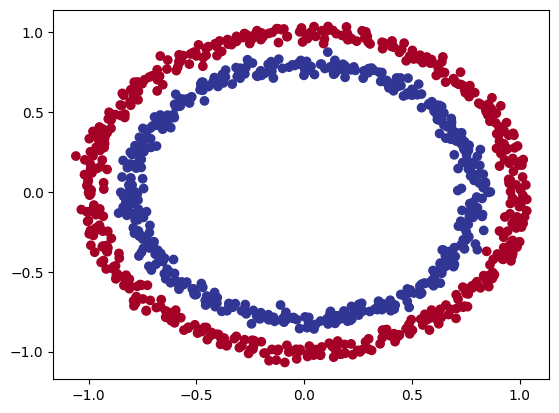

In [ ]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

**1.1 Check input and output shapes**

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


**1.2 Turn data into tensors and create train and test splits**

In [ ]:
# turn data into tensors
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% test data and 80% train
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run or an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# import pytorch and nn
import torch
from torch import nn
#make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.module` (almost all models in pytorch subclass `nn.module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. defines a`forward` method that outline the forward pass (or forward computation) of a model
4. Instatiate an instance of our model class and send it to the traget device:

In [ ]:
import torch
import torch.nn as nn
from sklearn import datasets

# 1. Set device (CPU or GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# 2. Construct the model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 2 nn.Linear layers
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # 3. Define the forward() method
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

# 4. Instantiate the model and move it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
#Let's replicate the model above using nn.squential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)

).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3046, -0.6931],
                      [ 0.4824,  0.5542],
                      [-0.1962,  0.4721],
                      [ 0.4567, -0.3773],
                      [-0.0712,  0.0195]])),
             ('0.bias', tensor([-0.2682,  0.5003,  0.2089, -0.4798, -0.0946])),
             ('1.weight',
              tensor([[ 0.0629,  0.1940,  0.0206,  0.0605, -0.1008]])),
             ('1.bias', tensor([-0.2929]))])

In [ ]:
# make predictions
import torch
import torch.nn as nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"

# 2. Create synthetic circle data
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 6. Define model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 5)
        self.layer_2 = nn.Linear(5, 1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

# 7. Instantiate model
model_0 = CircleModelV0().to(device)

# 8. Make predictions with untrained model
untrained_preds = model_0(X_test.to(device))

# 9. Print predictions and labels
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.8363],
        [-1.0020],
        [-0.3378],
        [-0.9778],
        [-0.2359],
        [-0.3378],
        [-0.8850],
        [-0.7292],
        [-0.3429],
        [-1.0119]], grad_fn=<SliceBackward0>)

First 10 labels:
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.5819,  1.0930],
         [ 0.0269,  1.5263],
         [-1.0925, -0.4652],
         [-0.4417,  1.5363],
         [ 0.6302, -1.1356],
         [ 0.9884, -0.8658],
         [ 1.3373,  0.8856],
         [ 1.5668,  0.3237],
         [-1.1644, -0.4346],
         [ 0.0868,  1.5480]]),
 tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.]]))

**2.1 Setup loss function and optimizer**

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error squared error).

For classification you might want binary corss entropy or categorical cross entropy(cross entropy)

As a reminder, the loss function measures how wrong your models predictions are.


And for optimizers,two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For some common choice of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [1]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## **3. Train Model**

to train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calaculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)



**3.1 Going from raw logits-> prdiction probabilities-> prediction labels**

Our model outputs are going to be **logits**

we can convert these **logits** into prediction probabilities by passing them to some kind of activation function(e.g.sigmoid for binary classification and softmax for multiclass
 classification).

Then we can convert our models's prediction probabilities to **prediction labels** by either rounding them or taking `argmax()`.


In [6]:
import torch
from torch import nn

# Model define
model_0 = nn.Sequential(
    nn.Linear(in_features=10, out_features=1)
)


model_0



Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
)

In [10]:
from sklearn.model_selection import train_test_split
import torch

# Device define karo
device = "cuda" if torch.cuda.is_available() else "cpu"

# Dummy input data
X = torch.rand(100, 10)
y = torch.randint(0, 2, (100,))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model define karo
from torch import nn
model_0 = nn.Sequential(nn.Linear(10, 1)).to(device)

# Move X_test to device
X_test = X_test.to(device)

# Forward pass
y_logits = model_0(X_test)[:5]
y_logits


tensor([[-0.3309],
        [-0.4111],
        [-0.5181],
        [-0.6052],
        [-0.2287]], device='cuda:0', grad_fn=<SliceBackward0>)

In [12]:
y_test[:5]

tensor([0, 1, 1, 0, 0])

In [13]:
# use the sigmoid activation function on our model logits to trun them into prediction probalities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4180],
        [0.3986],
        [0.3733],
        [0.3532],
        [0.4431]], device='cuda:0', grad_fn=<SigmoidBackward0>)

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0`  (class 0)

In [14]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [15]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [16]:
y_test[:5]

tensor([0, 1, 1, 0, 0])

**3.2 Building a training and testing loop**

In [18]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    import torch
from torch import nn
from sklearn.model_selection import train_test_split

# Set random seed
torch.manual_seed(42)

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Dummy data (replace with your real data)
X = torch.rand(100, 10)  # 100 samples, 10 features
y = torch.randint(0, 2, (100,)).float()  # binary labels, must be float for BCEWithLogitsLoss

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Move data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Model
model_0 = nn.Sequential(
    nn.Linear(10, 1)  # input features = 10, output = 1
).to(device)

# Loss function
loss_fn = nn.BCEWithLogitsLoss()

# Accuracy function
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return (correct / len(y_pred)) * 100

# Optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

# Epochs
epochs = 100

# Training and Evaluation Loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Loss + accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    # Print every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: | Train Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch 0: | Train Loss: 0.7060, Acc: 42.50% | Test Loss: 0.6883, Test Acc: 50.00%
Epoch 10: | Train Loss: 0.6738, Acc: 62.50% | Test Loss: 0.7039, Test Acc: 55.00%
Epoch 20: | Train Loss: 0.6666, Acc: 62.50% | Test Loss: 0.7173, Test Acc: 50.00%
Epoch 30: | Train Loss: 0.6638, Acc: 62.50% | Test Loss: 0.7248, Test Acc: 50.00%
Epoch 40: | Train Loss: 0.6619, Acc: 62.50% | Test Loss: 0.7289, Test Acc: 50.00%
Epoch 50: | Train Loss: 0.6601, Acc: 62.50% | Test Loss: 0.7313, Test Acc: 50.00%
Epoch 60: | Train Loss: 0.6585, Acc: 62.50% | Test Loss: 0.7331, Test Acc: 50.00%
Epoch 70: | Train Loss: 0.6569, Acc: 62.50% | Test Loss: 0.7345, Test Acc: 50.00%
Epoch 80: | Train Loss: 0.6554, Acc: 62.50% | Test Loss: 0.7358, Test Acc: 50.00%
Epoch 90: | Train Loss: 0.6539, Acc: 62.50% | Test Loss: 0.7370, Test Acc: 50.00%


**4. Make predictions and evaluate the model**

From the matrics it look our model isn't learning anything....

So to inspect it let's make some predictions and make them visuall

In other words, "Visualize, visualize, visualize!"

In [19]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Epoch 0: Loss=0.6928, Acc=67.00%, Test Loss=0.6978, Test Acc=59.00%
Epoch 10: Loss=0.6737, Acc=55.75%, Test Loss=0.6789, Test Acc=52.50%
Epoch 20: Loss=0.6515, Acc=69.50%, Test Loss=0.6592, Test Acc=65.50%
Epoch 30: Loss=0.6274, Acc=77.25%, Test Loss=0.6395, Test Acc=68.50%
Epoch 40: Loss=0.5991, Acc=82.88%, Test Loss=0.6127, Test Acc=79.00%
Epoch 50: Loss=0.5628, Acc=89.88%, Test Loss=0.5770, Test Acc=86.50%
Epoch 60: Loss=0.5184, Acc=95.38%, Test Loss=0.5329, Test Acc=94.00%
Epoch 70: Loss=0.4685, Acc=98.50%, Test Loss=0.4836, Test Acc=98.00%
Epoch 80: Loss=0.4163, Acc=99.50%, Test Loss=0.4331, Test Acc=99.00%
Epoch 90: Loss=0.3652, Acc=99.50%, Test Loss=0.3837, Test Acc=99.00%


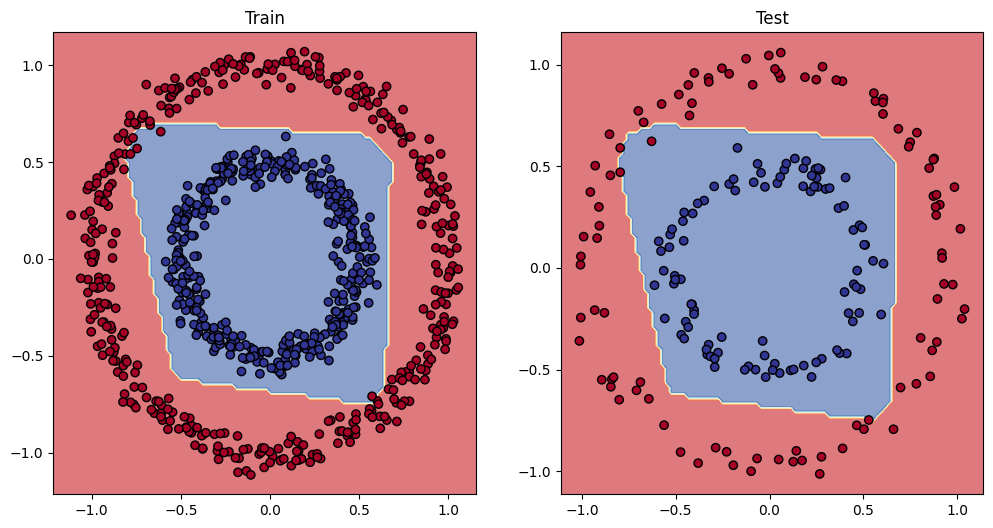

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Create circular 2D data using sklearn
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Device
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# 4. Neural network with non-linearity for circular decision boundary
model_0 = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
).to(device)

# 5. Loss, optimizer, accuracy
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    return correct / len(y_pred) * 100

# 6. Training loop
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}, Acc={acc:.2f}%, Test Loss={test_loss:.4f}, Test Acc={test_acc:.2f}%")

# 7. Decision boundary function
def plot_decision_boundary(model, X, y):
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    X_to_pred = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    with torch.inference_mode():
        model.eval()
        preds = torch.sigmoid(model(X_to_pred)).reshape(xx.shape)
        y_pred = torch.round(preds)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors="black")

# 8. Plot train/test decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()


**5. Improving a model (from a model perspective)**

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's prespective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochts: 100-> 1000


In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2434, -0.0081],
                      [-1.5918,  1.3532],
                      [-0.9155, -0.9247],
                      [-0.6479, -0.3302],
                      [-1.2609, -1.5558],
                      [ 1.5352, -1.7212],
                      [-0.0972, -0.2290],
                      [-1.4412, -1.3430],
                      [ 1.3603,  1.0990],
                      [ 0.0657,  0.5329]])),
             ('0.bias',
              tensor([-0.6408,  0.0349,  1.4081,  1.3622, -0.2159, -0.1925, -0.4028, -0.2086,
                       0.0431, -0.7199])),
             ('2.weight',
              tensor([[-0.3017, -1.4001,  1.0277,  0.5516, -1.4787, -1.2802,  0.0052, -1.4132,
                       -0.8591,  0.1726]])),
             ('2.bias', tensor([0.5478]))])

In [25]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [26]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [27]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.71669, Accuracy: 50.00% | Test loss: 0.70957, Test acc: 50.00%
Epoch: 100 | Loss: 0.69312, Accuracy: 48.88% | Test loss: 0.69329, Test acc: 49.50%
Epoch: 200 | Loss: 0.69295, Accuracy: 50.38% | Test loss: 0.69434, Test acc: 47.00%
Epoch: 300 | Loss: 0.69292, Accuracy: 51.00% | Test loss: 0.69486, Test acc: 47.00%
Epoch: 400 | Loss: 0.69291, Accuracy: 51.50% | Test loss: 0.69511, Test acc: 47.00%
Epoch: 500 | Loss: 0.69291, Accuracy: 51.62% | Test loss: 0.69523, Test acc: 47.00%
Epoch: 600 | Loss: 0.69291, Accuracy: 51.75% | Test loss: 0.69529, Test acc: 47.00%
Epoch: 700 | Loss: 0.69291, Accuracy: 51.50% | Test loss: 0.69531, Test acc: 47.00%
Epoch: 800 | Loss: 0.69291, Accuracy: 51.38% | Test loss: 0.69532, Test acc: 47.00%
Epoch: 900 | Loss: 0.69291, Accuracy: 51.50% | Test loss: 0.69533, Test acc: 47.00%


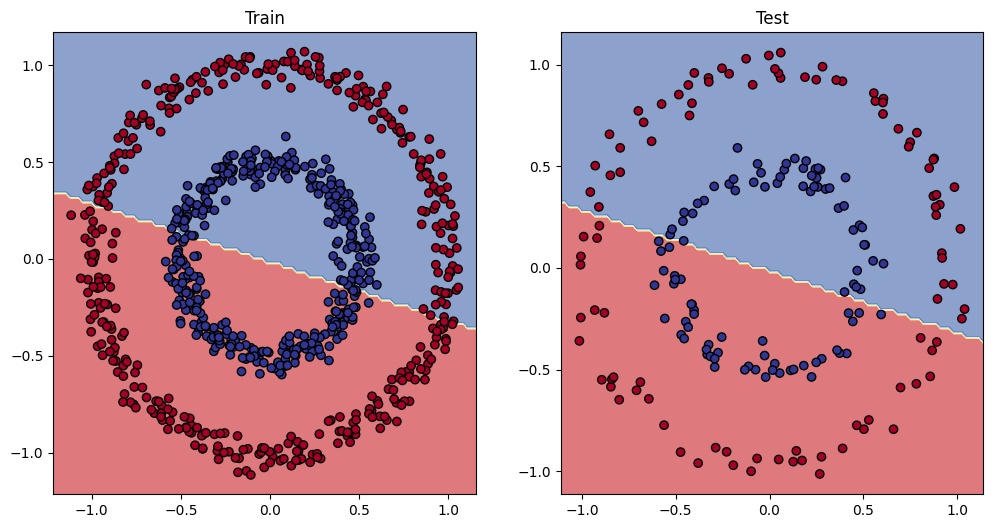

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

**5.1 Preparing data to see if our model can model a straight line**

In [29]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [30]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


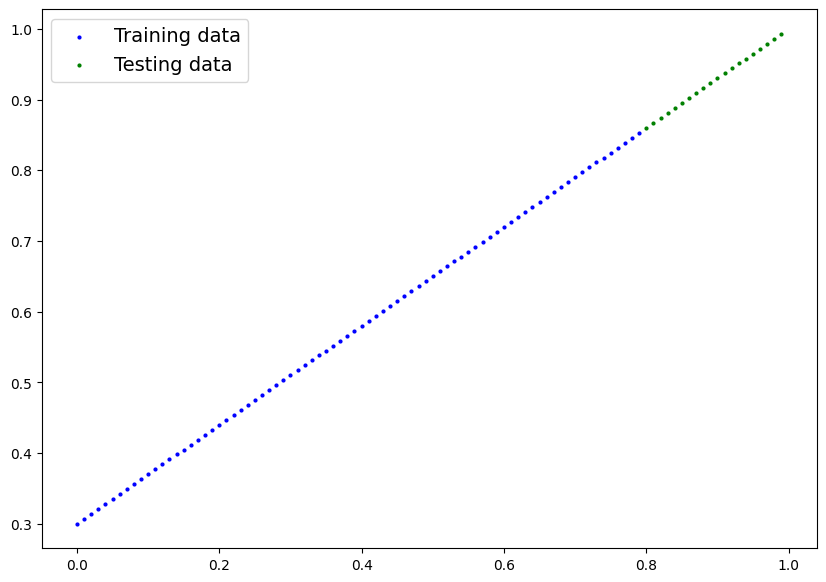

In [31]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

**5.2 Adjusting model_1 to fit a straight line**

In [32]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [34]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


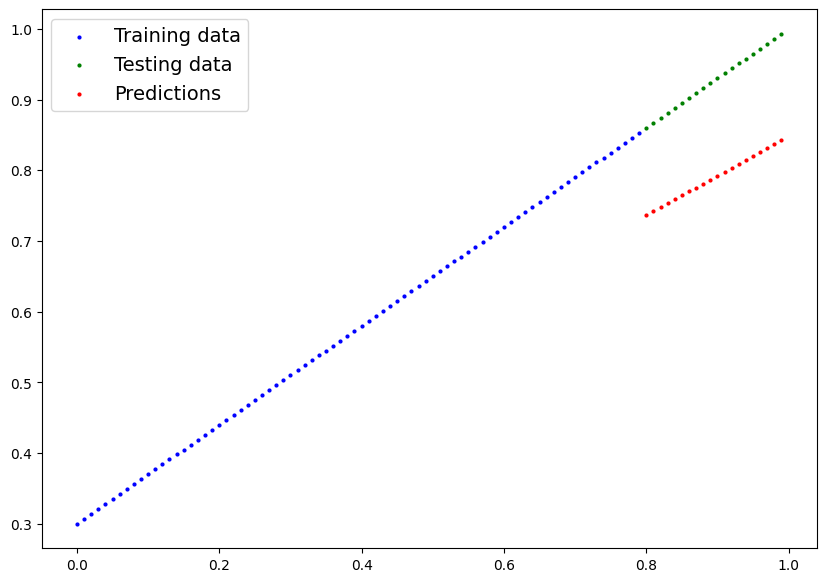

In [35]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

**6. The missing piece: non-linearity**

"What patterns could you draw if you were given an infinite amount of a straight and non-straight linea"?

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?


**6.1 Recreating non-linear data (red and blue circles)**

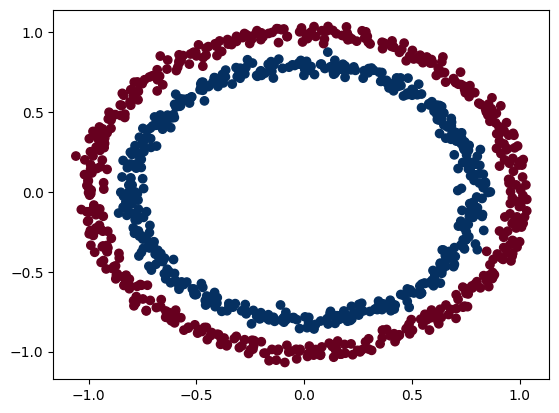

In [36]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [37]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

**6.2 Building a model with non-linearity**

* Linear = straight linear
* Non-linear = non-straight lines

Artifical neural networks are a large combination of linear(straight) and non-straight(non-linear)functions which are potentially able to find patterns in data.



In [38]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [39]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

**6.3 Training a model with non-linearity**

In [40]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


**6.4 Evaluating a model trained with non-linear activation functions**

In [41]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

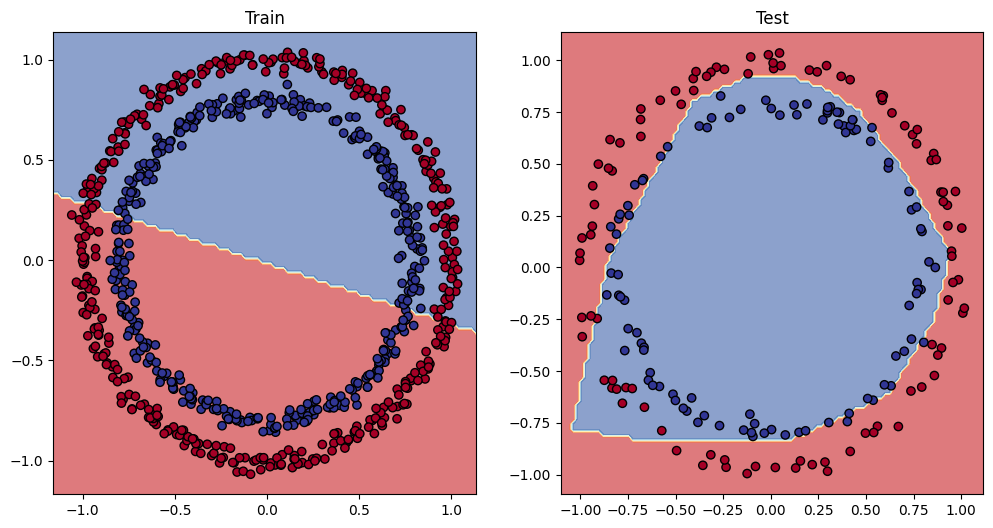

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity